# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


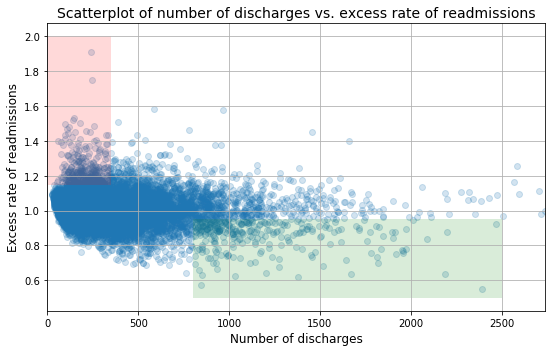

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Your turn
A. Do you agree with the above analysis and recommendations? Why or why not?

I think the conclusions and observations do not have adequate supporting evidence. I will go through each points and do some additional analysis to test these statements

# Finding evidence to test first statement: "Overall, rate of readmissions is trending down with increasing number of discharges"

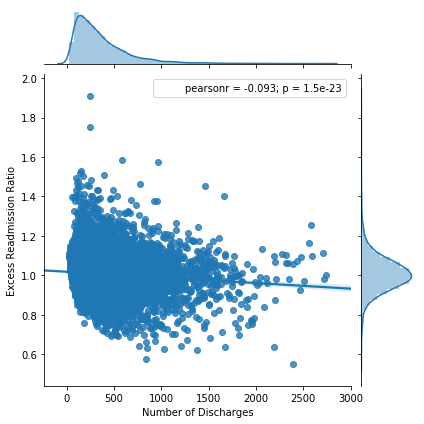

In [10]:
#this can be done by plotting a regression line and look at the sign and statistical significance of coefficient

import seaborn as sns

data=clean_hospital_read_df.loc[clean_hospital_read_df.index[81:-3]]
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data, kind="reg")

plt.show()

It shows that overall excess readmission ratio and number of discharges have a statistically significant negative correlation (p value=1.5e-23<<0.01).

# Finding evidence to test next statement: 

"With lower number of discharges, there is a greater incidence of excess rate of readmissions"
"With higher number of discharges, there is a greater incidence of lower rates of readmissions"

first do segmentation on the data based on the number of discharges: those with <350 discharges, and those with >800 discharges

In [11]:
low_discharge=data[data['Number of Discharges']<359]
high_discharge=data[data['Number of Discharges']>800]

Then I do proportion ztest and permutation test to compare the fraction of incidence with high excess rate of readmissions: rate greater than 1.15

In [16]:
# proportion ztest to compare the fraction of incidence with high excess rate of readmissions: rate greater than 1.15
import statsmodels.api as sm

trials=[len(low_discharge['Excess Readmission Ratio']), len(high_discharge['Excess Readmission Ratio'])]
counts=[sum(low_discharge['Excess Readmission Ratio']>=1.15), sum(high_discharge['Excess Readmission Ratio']>=1.15)]

print (trials, counts)
z_score, p_value = sm.stats.proportions_ztest(counts,trials)


[7153, 896] [362, 48]


In [17]:
print ("p value is",p_value)

p value is 0.703718160418


p value of two sample proportion z test is 0.70>>0.01, which suggests that there is not statistically significant difference between the proportion of excess readmission ratio between hospitals with <300 discharges and hospitals with >800 discharges

In [30]:
#datas is a list that contains data1 and data2: datas=[data1, data2], compared_to is the data that the permuted data is compared to
def permutation_sample(data1, data2, size=1):
    """Generate a permutation sample from two data sets."""
    perm_samp=np.empty(size)
    for i in range(size):
        # Concatenate the data sets: data
        comb_data = np.concatenate((data1, data2))

        # Permute the concatenated array: permuted_data
        permuted_data = np.random.permutation(comb_data)

        # Split the permuted array into two: perm_sample_1, perm_sample_2
        perm_samp[i]=np.sum(permuted_data[:len(data1)]) / len(permuted_data[:len(data1)])
        
    return perm_samp


In [37]:
# permutation test to the hypothesis that hospitals with low discharge and hospitals with high discharge have equal incidence of high excess rate of readmissions
# Acquire permutation samples
data1=low_discharge['Excess Readmission Ratio']>=1.15
data2=high_discharge['Excess Readmission Ratio']>=1.15
perm_replicates=permutation_sample(data1, data2, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates>(sum(data1)/len(data1))) / len(perm_replicates)
print('p-value of permutation test is', p)

p-value of permutation test is 0.6198


p value of permutation test is 0.63077 which is also much larger than the critical value 0.01. The hypothesis cannot be rejectd, or there is not statistical significant difference between the hospitals with low discharge and hospitals with high discharge in their incidence of high excess rate (over 1.15)

Next I do proportion ztest and permutation test to to compare the fraction of incidence with low rate of readmissions: rate lower than 0.95

In [34]:
# proportion ztest to compare the fraction of incidence with low rate of readmissions: rate lower than 0.95
counts=[sum(low_discharge['Excess Readmission Ratio']<=0.95), sum(high_discharge['Excess Readmission Ratio']<=0.95)]

z_score, p_value = sm.stats.proportions_ztest(counts,trials)

In [35]:
print ('proportion ztest p value is', p_value)

proportion ztest p value is 1.06775270597e-18


Proportion z test p value is much smaller than critical value 0.01. This suggests that hospitals with high discharge (>800) has statistically significantly more incidence of low rate of readmission

In [38]:
# permutation test to the hypothesis that hospitals with low discharge and hospitals with high discharge have equal incidence of low rate of readmissions
# Acquire permutation samples
data1=low_discharge['Excess Readmission Ratio']<=0.95
data2=high_discharge['Excess Readmission Ratio']<=0.95
perm_replicates=permutation_sample(data1, data2, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates>(sum(data2)/len(data2))) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0


p value of permutation test is 0 which is also much smaller than the critical value 0.01. The hypothesis is rejectd, or there is a statistical significant difference between the hospitals with low discharge and hospitals with high discharge in their incidence of low rate of readmission (<0.95)

# Finding evidence to test next statement: 
- "In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [43]:
mean=data[data['Number of Discharges']<100]['Excess Readmission Ratio'].mean()
percent=round(100*sum(data[data['Number of Discharges']<100]['Excess Readmission Ratio']>1)/len(data[data['Number of Discharges']<100]['Excess Readmission Ratio']), 2)
print ("In hospitals/facilities with number of discharges < 100, mean excess readmission rate is {}, {}% have xcess readmission rate greater than 1".format(mean, percent))

mean=data[data['Number of Discharges']>1000]['Excess Readmission Ratio'].mean()
percent=round(100*sum(data[data['Number of Discharges']>1000]['Excess Readmission Ratio']>1)/len(data[data['Number of Discharges']>1000]['Excess Readmission Ratio']), 2)
print ("In hospitals/facilities with number of discharges >1000, mean excess readmission rate is {}, {}% have xcess readmission rate greater than 1".format(mean, percent))

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.0226183501683506, 63.22% have xcess readmission rate greater than 1
In hospitals/facilities with number of discharges >1000, mean excess readmission rate is 0.9790730434782613, 44.57% have xcess readmission rate greater than 1


The second statement is a inaccurate, In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.979 and 44.6% have excess readmission rate greater than 1

statement that There is a significant correlation between hospital capacity (number of discharges) and readmission rates" has been confirmed by the p value of pearson correlation. 

Statement "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions." is a possibility but may not be the case. Number of discharges may not be the best indicator of hospital capacity. Number of discharges does not only depend on hospital capacity but also on the severity and chronicity of disease which may affect the length of stay in hospital and  likelihood of survival until discharge. The rate of readmission needs to be assessed seperately for chronic conditions such as COPD and for short-term ones such as flu. The earlier analysis show that hospitals with low number of discharges and hospitals with high number of discharges do not have significantly different fraction of incidence of high excess rate. Rather, they differ in the fraction of incidence in low readmission rate (<0.95). This implies the possibility that hospitals with high number of discharges are those where on average patients have less severe or chronic condition and less likely have multiple onsets within 30 days. 

The last bullet points: 
    
D. Regulatory policy recommendations: 
- Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
- Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Neither is valid recommendation unless more data is collected, such as the reasons that patients needed care, the average length of stay in hospital, and patients' survival rate. 